In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

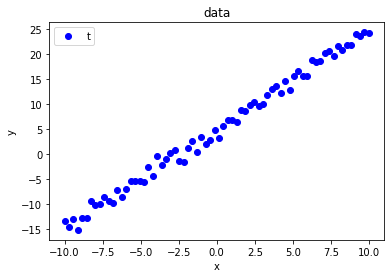

In [3]:
N = 70
X = np.linspace(-10,10,N)
Y = X * 2 + 5 + np.random.randn(N)

plt.title('data')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.plot(X,Y,"ob")  
plt.legend("test")  
plt.show()  

In [4]:
w = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

epochs = 240

lr = 0.01

###计算公式：
采用公式求梯度
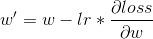
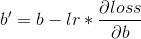
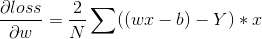
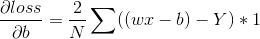

In [5]:
for epoch in range(epochs):
    current_w, current_b = 0., 0.
    for i in range(0, N):
        current_w = current_w + 2/N * (w * X[i] + b - Y[i])* X[i]
        current_b = current_b + 2/N * (w * X[i] + b - Y[i])
    w = w - lr * current_w
    b = b - lr * current_b
    if epoch % 40 == 0:
        current_loss = 0.
        for j in range(0, N):
            current_loss = current_loss + 1/N * (w * X[i] + b -Y[i])**2
        print('epoch :',epoch, 'current_loss:', current_loss)

epoch : 0 current_loss: tf.Tensor([110.473145], shape=(1,), dtype=float32)
epoch : 40 current_loss: tf.Tensor([2.492262], shape=(1,), dtype=float32)
epoch : 80 current_loss: tf.Tensor([0.1373018], shape=(1,), dtype=float32)
epoch : 120 current_loss: tf.Tensor([0.02820007], shape=(1,), dtype=float32)
epoch : 160 current_loss: tf.Tensor([0.16640097], shape=(1,), dtype=float32)
epoch : 200 current_loss: tf.Tensor([0.26511255], shape=(1,), dtype=float32)


In [6]:
print('last weight w={0} and b={1}'.format(w,b))

last weight w=[1.9812341] and b=[4.9509416]


In [10]:
w1 = tf.Variable(tf.zeros([1]),dtype=tf.float32)
b1 = tf.Variable(tf.zeros([1]),dtype=tf.float32)

In [11]:
epochs = 80
lr = 0.001
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, N):
        with tf.GradientTape(persistent=True) as tape:
            loss = tf.square(w1* X[i] + b1  - Y[i])
        grads_w = tape.gradient(loss, w1)
        w1.assign_sub(lr * grads_w)
        grads_b = tape.gradient(loss, b1)
        b1.assign_sub(lr * grads_b)
        total_loss +=loss
    if epoch % 10 == 0 or epoch == epochs:
        print('epoch :',epoch, 'current_loss:', total_loss.numpy()/N)

epoch : 0 current_loss: [26.404959]
epoch : 10 current_loss: [3.1945202]
epoch : 20 current_loss: [1.3171378]
epoch : 30 current_loss: [1.1227015]
epoch : 40 current_loss: [1.1002275]
epoch : 50 current_loss: [1.0969418]
epoch : 60 current_loss: [1.0962803]
epoch : 70 current_loss: [1.0961089]


In [12]:
print('last weight w={0} and b={1}'.format(w1.numpy(),b1.numpy()))

last weight w=[1.9878114] and b=[4.938028]
